In [1]:
# !pip install pandas
# !pip install opencv-python
# !pip install seaborn
# !pip install kagglehub
# !pip install scikit-learn
# !pip install pydot

In [2]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras 
from tqdm import tqdm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import glob 
import pandas as pan
import matplotlib.pyplot as plotter
import warnings
warnings.filterwarnings('ignore')


2024-12-22 20:47:41.752032: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-22 20:47:41.893933: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-22 20:47:42.611599: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /root/miniconda3/lib/python3.8/site-packages/cv2/../../lib64:/usr/local/nvidia/lib:/usr

In [3]:
image_data='../dataset'
pd.DataFrame(os.listdir(image_data),columns=['Files_Name'])

,Files_Name
0,angry
1,disgust
2,fear
3,happy
4,neutral
5,sad
6,surprise


In [4]:
files = [i for i in glob.glob(image_data + "//*//*")]
np.random.shuffle(files)
labels = [os.path.dirname(i).split("/")[-1] for i in files]
data = zip(files, labels)
dataframe = pan.DataFrame(data, columns = ["Image", "Label"])
dataframe

,Image,Label
0,../dataset/disgust/870feb40-1a66-4bac-8e8c-010...,disgust
1,../dataset/disgust/0555a4d6-14c6-43e9-8a21-6c7...,disgust
2,../dataset/happy/9e94195c-57aa-4b43-ae1a-23f04...,happy
3,../dataset/neutral/575aea3e-ed6a-449d-81e9-9c7...,neutral
4,../dataset/happy/51703b9d-2ab9-4d89-a569-cbbdb...,happy
...,...,...
880,../dataset/neutral/eeab0d4e-f3c8-44cb-b4c8-144...,neutral
881,../dataset/fear/57b69cf5-b1b4-481a-9665-6a751b...,fear
882,../dataset/disgust/7f964ab6-3bc9-41bc-b009-a9e...,disgust
883,../dataset/disgust/97ca43a3-ba0d-4142-b61e-07f...,disgust


Label
angry       20.338983
surprise    15.932203
disgust     14.350282
sad         14.124294
happy       14.011299
neutral     12.655367
fear         8.587571
Name: proportion, dtype: float64


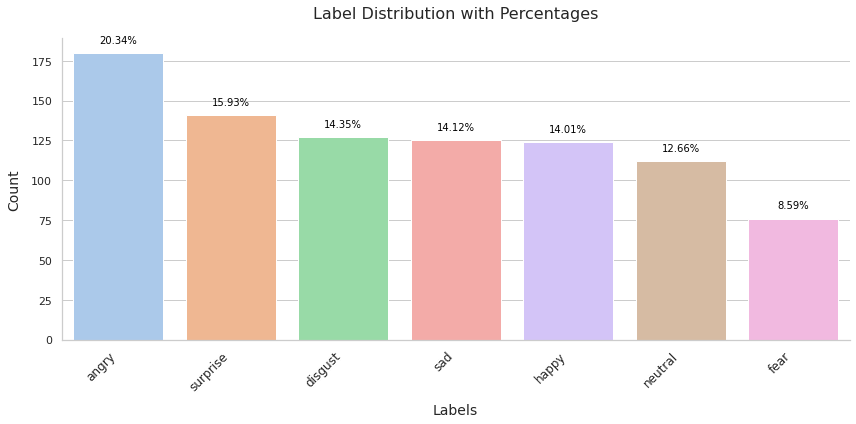

In [5]:
# Set a theme for better aesthetics
sns.set_theme(style="whitegrid")

# Calculate counts and percentages for each label
count_data = dataframe["Label"].value_counts()
percentage_data = dataframe["Label"].value_counts(normalize=True) * 100  # Calculate percentage

# Print percentage for each label (optional)
print(percentage_data)

# Sort the labels based on count values in descending order
sorted_data = count_data.sort_values(ascending=False).index

# Create a color palette for the bars
palette = sns.color_palette("pastel", len(sorted_data))

# Plot the count plot with sorted labels
plt.figure(figsize=(12, 6))
ax = sns.countplot(x=dataframe["Label"], order=sorted_data, palette=palette)

# Annotate each bar with the percentage value
for p in ax.patches:
    height = p.get_height()  # Get the height of the bar
    percentage = f'{(height / count_data.sum()) * 100:.2f}%'  # Calculate percentage
    ax.annotate(percentage,  # The label to be annotated
                (p.get_x() + p.get_width() / 2., height),  # Position of the label
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 8), textcoords='offset points')

# Rotate x-axis labels for better visibility and set the label font size
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add title and labels with improved fonts and padding
plt.title("Label Distribution with Percentages", fontsize=16, pad=20)
plt.xlabel("Labels", fontsize=14, labelpad=10)
plt.ylabel("Count", fontsize=14, labelpad=10)

# Remove the top and right spines for a cleaner look
sns.despine()

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


<h5><span style="align:left; color:black; font-weight:550; font-size:110%">
    ➡️  Visualize the number of six categories.
</span></h5>

In [6]:
train_data_dir =image_data
batch_size = 64
target_size = (224,224)
validation_split = 0.2
train= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="training",
    seed=100,
    image_size=target_size,
    batch_size=batch_size,
)
validation= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=100,
    image_size=target_size,
    batch_size=batch_size,
)

for images, labels in train.take(1):
    print(images.shape)  
    print(labels.shape)  

Found 887 files belonging to 7 classes.
Using 710 files for training.


2024-12-22 20:47:43.728986: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-22 20:47:44.423112: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 20811 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:1a:00.0, compute capability: 7.5


Found 887 files belonging to 7 classes.
Using 177 files for validation.
(64, 224, 224, 3)
(64,)


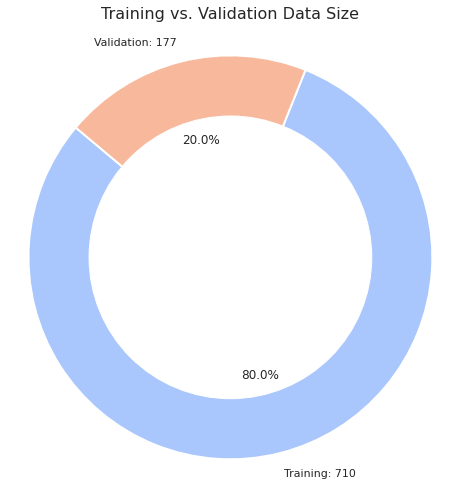

In [7]:
sns.set_theme(style="whitegrid")

# Function to calculate dataset size
def get_dataset_size(dataset):
    return sum([len(batch[0]) for batch in dataset])

train_size = get_dataset_size(train)
validation_size = get_dataset_size(validation)

# Plot pie chart with enhanced aesthetics
sizes = [train_size, validation_size]
labels = ['Training', 'Validation']
sizes_labels = [f'{label}: {size}' for label, size in zip(labels, sizes)]

# Set up color palette for pie chart
colors = sns.color_palette("coolwarm", len(sizes))

plt.figure(figsize=(8, 8))
plt.pie(
    sizes, 
    labels=sizes_labels, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors, 
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)

# Set title with larger font size and padding
plt.title('Training vs. Validation Data Size', fontsize=16, pad=20)

# Add circle in the center to create a donut chart for a modern look
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

# Equal aspect ratio ensures the pie chart is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()

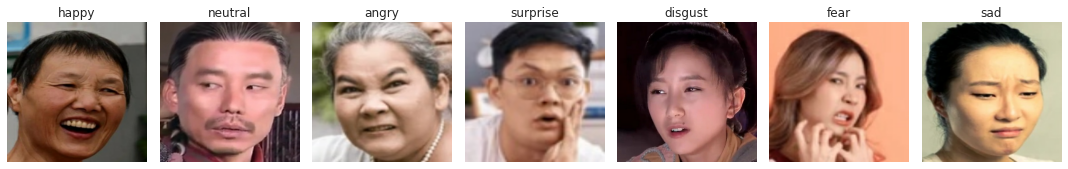

In [8]:
# Get the class names from the training dataset
class_labels = train.class_names

# Set up the figure size for displaying images (adjusted for the number of classes)
plt.figure(figsize=(15, 10))

# Track the classes already shown
shown_classes = set()

# Take one batch from the train dataset
for images, labels in train.take(1):
    for i in range(len(images)):  # Loop through the batch
        class_name = class_labels[labels[i]]
        if class_name not in shown_classes:
            # Plot the image only if its class has not been shown yet
            ax = plt.subplot(1, 7, len(shown_classes) + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_name)
            plt.axis("off")
            shown_classes.add(class_name)
        
        # Stop once all classes have been displayed
        if len(shown_classes) == len(class_labels):
            break

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()

<h5><span style="align:left; color:black; font-weight:550; font-size:110%">
    ➡️  Visual observation of the label's corresponding photo.
</span></h5>

In [9]:
# Import the EfficientNetV2M model pre-trained on ImageNet without the top layers
base_model = tf.keras.applications.ConvNeXtTiny(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze the base model layers to prevent them from being trained
base_model.trainable = True  #Unfreeze Some Layers for Fine-Tuning

fine_tune_at = len(base_model.layers) - 20  
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Create  model
keras_model = keras.models.Sequential()
keras_model.add(base_model)
keras_model.add(keras.layers.GlobalAveragePooling2D())  # Replace Flatten with GlobalAveragePooling
keras_model.add(keras.layers.BatchNormalization())  # Add a Batch Normalization Layer
keras_model.add(keras.layers.Dense(128, activation='relu'))  # Increase the Model Capacity
keras_model.add(keras.layers.Dropout(0.3))  # Reduce Regularization
keras_model.add(keras.layers.Dense(7, activation=tf.nn.softmax))  # 6 output units for classification

# Display the model's architecture
keras_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 convnext_tiny (Functional)  (None, 7, 7, 768)         27820128  
                                                                 
 global_average_pooling2d (G  (None, 768)              0         
 lobalAveragePooling2D)                                          
                                                                 
 batch_normalization (BatchN  (None, 768)              3072      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 128)               98432     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 7)                 9

<h5><span style="align:left; color:black; font-weight:550; font-size:110%">
    ➡️  Visualization represents the model used.
</span></h5>

In [10]:
# Define a checkpoint callback to save the best model
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min')

# Define an early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [11]:
keras_model.compile(optimizer ='Adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist=keras_model.fit_generator(train,epochs=20,validation_data=validation,callbacks=[checkpoint,early_stopping])

Epoch 1/20


2024-12-22 20:47:58.457424: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8101
2024-12-22 20:47:59.485295: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f0135444200 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-12-22 20:47:59.485319: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 2080 Ti, Compute Capability 7.5
2024-12-22 20:47:59.728002: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2024-12-22 20:48:01.197556: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


12/12 [==============================] - 23s 825ms/step - loss: 2.0431 - accuracy: 0.3254 - val_loss: 1.6501 - val_accuracy: 0.3616
Epoch 2/20
12/12 [==============================] - 4s 321ms/step - loss: 0.8282 - accuracy: 0.7225 - val_loss: 1.5746 - val_accuracy: 0.3785
Epoch 3/20
12/12 [==============================] - 4s 280ms/step - loss: 0.4529 - accuracy: 0.8577 - val_loss: 1.6235 - val_accuracy: 0.3785
Epoch 4/20
12/12 [==============================] - 4s 328ms/step - loss: 0.3034 - accuracy: 0.9099 - val_loss: 1.4292 - val_accuracy: 0.4915
Epoch 5/20
12/12 [==============================] - 4s 280ms/step - loss: 0.2028 - accuracy: 0.9451 - val_loss: 1.5266 - val_accuracy: 0.4124
Epoch 6/20
12/12 [==============================] - 4s 311ms/step - loss: 0.1696 - accuracy: 0.9451 - val_loss: 1.4403 - val_accuracy: 0.4972
Epoch 7/20
12/12 [==============================] - 4s 340ms/step - loss: 0.0866 - accuracy: 0.9817 - val_loss: 1.3340 - val_accuracy: 0.5480
Epoch 8/20
12/12

<h5><span style="align:left; color:black; font-weight:550; font-size:110%">
    ➡️  Training.
</span></h5>

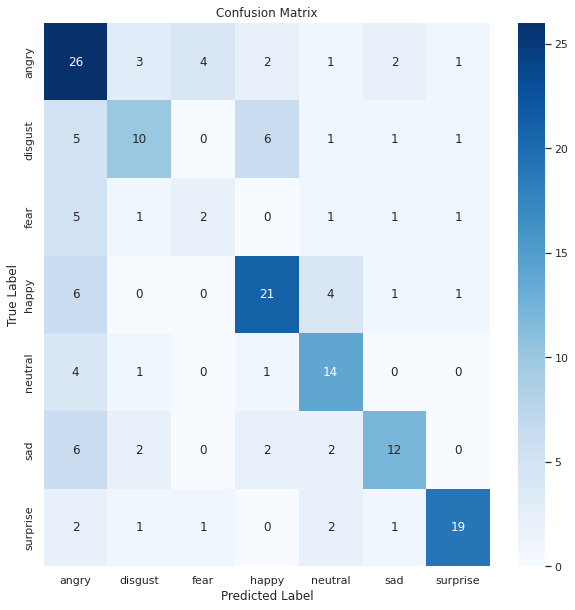

In [12]:
# Function to get true and predicted labels from the dataset
def get_true_and_predicted_labels(model, dataset):
    true_labels = []  # List to store true labels
    predicted_labels = []  # List to store predicted labels
    
    for img_batch, label_batch in dataset:
        predictions = model.predict(img_batch, verbose=0)  # Get model predictions
        predicted_labels.extend(np.argmax(predictions, axis=1))  # Get predicted class labels
        
        # Assume label_batch is already in the correct one-dimensional format
        true_labels.extend(label_batch.numpy())  # Convert true labels to numpy and add to the list
    
    return np.array(true_labels), np.array(predicted_labels)  # Return as numpy arrays

# Get true labels and predicted labels
true_labels, predicted_labels = get_true_and_predicted_labels(keras_model, validation)

# Compute confusion matrix with raw counts
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix with raw counts
plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',  # 'd' for integer format
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')  # X-axis label
plt.ylabel('True Label')  # Y-axis label
plt.title('Confusion Matrix')  # Title of the plot
plt.show()  # Display the plot


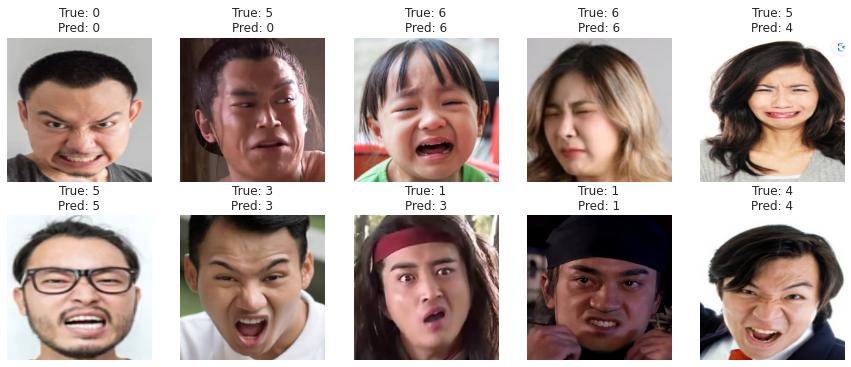

In [13]:
# Function to display images along with their true and predicted labels
def display_images(images, true_labels, predicted_labels, num=10):
    plt.figure(figsize=(15, 6))  # Adjust the figure size to accommodate 10 images
    for i in range(num):
        plt.subplot(2, 5, i + 1)  # Display images in a 2-row, 5-column layout
        plt.imshow(images[i] / 255.0)  # Normalize the image data to the range [0, 1]
        plt.title(f'True: {true_labels[i]}\nPred: {predicted_labels[i]}')  # Show true and predicted labels
        plt.axis('off')  # Hide axis ticks and labels
    plt.show()  # Display the figure

# Get the validation images
val_images = next(iter(validation))[0].numpy()  # Assuming validation is an iterable dataset

# Display the first 10 images along with their true and predicted labels
display_images(val_images, true_labels, predicted_labels, num=10)


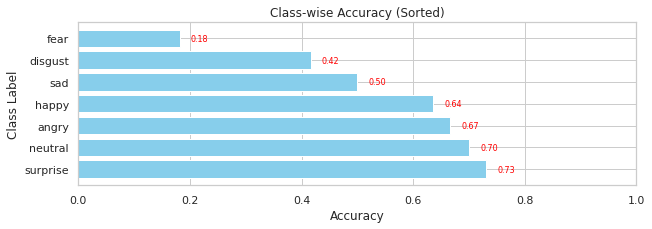

In [14]:
# Calculate accuracy for each class
class_accuracies = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)

# Sort class accuracies and corresponding class labels
sorted_indices = np.argsort(class_accuracies)[::-1]  # Indices of accuracies in descending order
sorted_class_labels = np.array(class_labels)[sorted_indices]
sorted_class_accuracies = class_accuracies[sorted_indices]

# Plot class accuracies
plt.figure(figsize=(10, 3))
bars = plt.barh(sorted_class_labels, sorted_class_accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.ylabel('Class Label')
plt.title('Class-wise Accuracy (Sorted)')
plt.xlim(0, 1)  # Accuracy ranges from 0 to 1

# Add the accuracy values outside the bars, vertically centered
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.02, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', 
             va='center', ha='left', fontsize=8, color='red')

plt.show()

In [15]:
score, acc = keras_model.evaluate(validation)
print('validation Loss =', score)
print('validation Accuracy =', acc)

3/3 [==============================] - 1s 196ms/step - loss: 1.4443 - accuracy: 0.5876
validation Loss = 1.4443248510360718
validation Accuracy = 0.5875706076622009


In [16]:
hist_=pd.DataFrame(hist.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,2.043118,0.325352,1.650137,0.361582
1,0.828155,0.722535,1.574599,0.378531
2,0.452913,0.857746,1.623492,0.378531
3,0.303409,0.909859,1.429178,0.491525
4,0.202785,0.945070,1.526562,0.412429
5,0.169576,0.945070,1.440308,0.497175
6,0.086569,0.981690,1.333973,0.548023
7,0.098177,0.973239,1.368631,0.553672
8,0.053774,0.992958,1.314063,0.570621
9,0.082764,0.978873,1.304561,0.576271


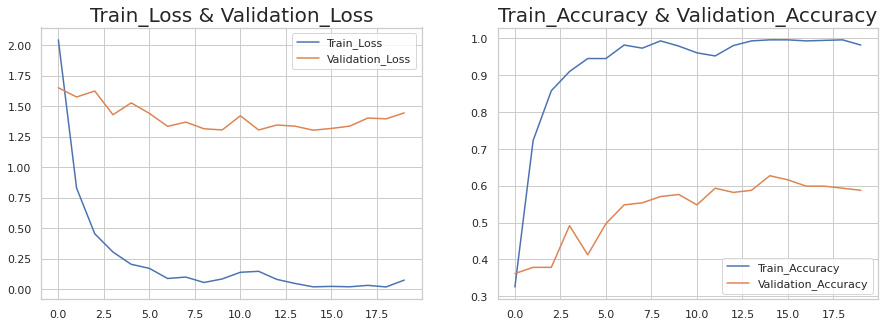

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],label='Train_Loss')
plt.plot(hist_['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()

<h5><span style="align:left; color:black; font-weight:550; font-size:110%">
    ➡️  plot the training curve of the training set and the validation set.
</span></h5>